In [2]:
#Nous importons les packages dont nous aurons besoin
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import expon

<h1><strong>1.Un modèle SIR déterministe</strong></h1>

<h2>Théorie</h2>

<h3>T1)</h3>

* $\frac{\mathrm d (S+I+R)}{\mathrm d t}$ = - $\frac{\beta  I(t)  S(t)}{M_{0}}$ + $\frac{\beta  I(t)  S(t)}{M_{0}}$ - $\gamma$I(t) + $\gamma$I(t) = 0  
  Donc S(t) + I(t) + R(t) est une constante du temps. Elle vaut sa valeur initiale : S(0) + I(0) + R(0) = $M_{0}$  
  De plus, nous avons : 0 $\leq$ S(t) $\leq$ S(t) + I(t) + R(t) = $M_{0}$  
  Car nous sommes sur [0,+$\infty$] donc S, I et R sont positifs. Nous faisons de même pour I et R.

<h3>T2)</h3>

*  $\frac{\mathrm d (S)}{\mathrm d t}$ = - $\frac{\beta  I(t)  S(t)}{M_{0}}$ $\leq$ 0  
   Donc S est décroissante. D'après <strong>le théorème de la limite monotone</strong>, S admet une limite +$\infty$.  
*  $\frac{\mathrm d (R)}{\mathrm d t}$ = $\gamma$I(t) $\geq$ 0 ; donc, de la même manière, R admet une limite en +$\infty$.
   D'après la question 1, I(t) = $M_{0}$ - R(t) - S(t), donc I admet une limite en +$\infty$.  
*  $\frac{\mathrm d (R)}{\mathrm d t}$ = $\gamma$I(t) $\rightarrow$ $\gamma$I($\infty$)  
   Supposons que I($\infty$) $\ne$ 0. On a alors I($\infty$)>0 car  I(t)$\geq$0.  
   R(v) - R(u) = $\displaystyle \int_{u}^{v} R'(t) \, \mathrm{d}t$ = $\displaystyle \int_{u}^{v} \gamma I(t) \, \mathrm{d}t$>  
   Pour t suffisamment grand, nous avons $\gamma$I(t) $\geq$ $\gamma$ $\frac{I(\infty)}{2}$.  
   Donc pour u et v suffisamment grands, il vient:
    R(v) - R(u) $\geq$(v-u)$\frac{I(\infty)}{2}$ $\rightarrow$+$\infty$  
   C'est exclu car R(t) $\in$ [0,$M_{0}$]. Donc I($\infty$)=0 , et cette solution converge un point limite (S($\infty$),0,R($\infty$)) quand t $\rightarrow$+$\infty$



<h3>T3)</h3><p>$\frac{\mathrm d I}{\mathrm d t}$ = I(t)($\frac{\beta S(t)}{M_{0}}$ - $\gamma$)</p>
<p>I est décroissante $\Leftrightarrow$ $\frac{\mathrm d I}{\mathrm d t}$ $\leq$0</p>
<p>I est décroissante $\Leftrightarrow$ I(t)=0 ou $\frac{\beta S(t)}{M_{0}}$ $\leq$ $\gamma$.</p>
<p>I est décroissante $\Leftrightarrow$ I(t)=0 ou S(t) $\leq$ $\frac{M_{0}\gamma}{\beta}$</p>
<p>Si on part de I(0)$\ne$0, on doit donc avoir au moins au début S(0)$\leq$$\frac{M_{0}\gamma}{\beta}$ pour que I soit décroissante. Or S est décroissante donc nous avons:</p>
<p>$\forall$ t, S(t)$\leq$S(0)$\leq$ $\frac{M_{0}\gamma}{\beta}$</p>
<p><strong>Donc la condition est:</strong> S(0)$\leq$$\frac{M_{0}\gamma}{\beta}$</p>
<p>$\bullet$ On suppose que: S(0)$\geq$$\frac{M_{0}\gamma}{\beta}$. I commance donc par croître, mais nous savons que I(t)$\rightarrow$0, donc la croissance de I s'arrête forcément à un moment et décroît ensuite. Autrement formulé, à un instant S(t) devient supérieure $\frac{M_{0}\gamma}{\beta}$. Alors:</p>
<p>$\forall$ $t_{+}$ $\geq$t, S($t_{+}$)$\leq$$\frac{M_{0}\gamma}{\beta}$ et I ne fait plus que décroître jusqu'à 0.</p>
<p>$\bullet$ Si $R_{0}$$\leq$1, alors $\frac{\beta}{\gamma}$$\leq$1 donc $\frac{\gamma}{\beta}$$\geq$1 donc $\frac{M_{0}\gamma}{\beta}$$\geq$$M_{0}$.</p>  
<p>Donc nous avons forcément S(0) $\leq$ $\frac{M_{0}\gamma}{\beta}$</p>
<p>et on est dans le cas ou Ine fait que décroître: le nombre d'infectés n'augmente jamais au cours du temps</p>
$\bullet$ Si $R_{0}$>1, alors $\frac{\gamma}{\beta}$ $\Longrightarrow$ $\frac{M_{0}\gamma}{\beta}$ <1.
<p>Lorsqu'on part de R(0)=0 et que I(0) est suffisamment petit: 0$\le$S(0)+I(0)$\le$$M_{0}$. Donc S(0) est assez proche de $M_{0}$ pour avoir :</p>
$\frac{M_{0}\gamma}{\beta}$ < S(0) $\le$ $M_{0}$.  
<p>On est alors dans le cas où I commence par croître avant de décroitre.</p>
                                                                                                          

<h2>Simulation</h2>

In [5]:
m0=1
delta_t=0.01
N=2000

In [3]:
#S1
#Fonction qui renvoie la liste des valeurs des suites jusqu'au rang N à partir des paramètres initiaux de la suite
def evolution1(N,delta_t,beta,gamma,m0,S0,R0,I0):
    S=np.zeros(N)
    R=np.zeros(N)
    I=np.zeros(N)
    S[0]=S0
    R[0]=R0
    I[0]=I0
    T=[delta_t*i for i in range(0,N)]
    for n in range(0,N-1):              #Dans cette boucle for nous utilisons les éléments du rang n pour calculer ceux du rang n+1
        S[n+1]=S[n]-beta*I[n]*S[n]*delta_t/m0
        I[n+1]=I[n]-gamma*I[n]*delta_t+beta*I[n]*S[n]*delta_t/m0
        R[n+1]=R[n]+gamma*I[n]*delta_t
    return [S,I,R]

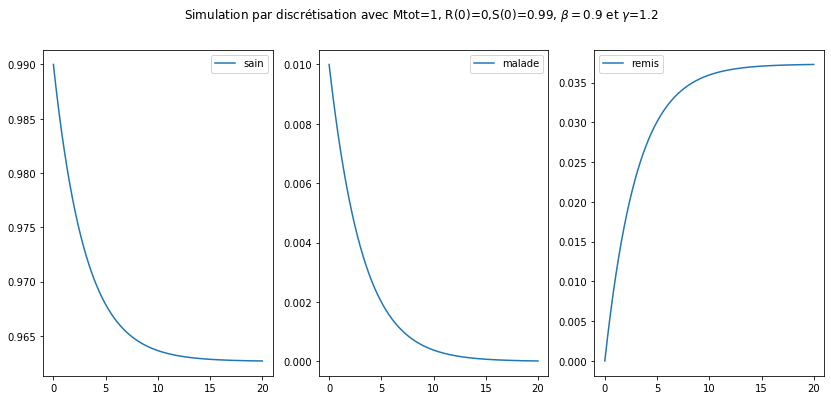

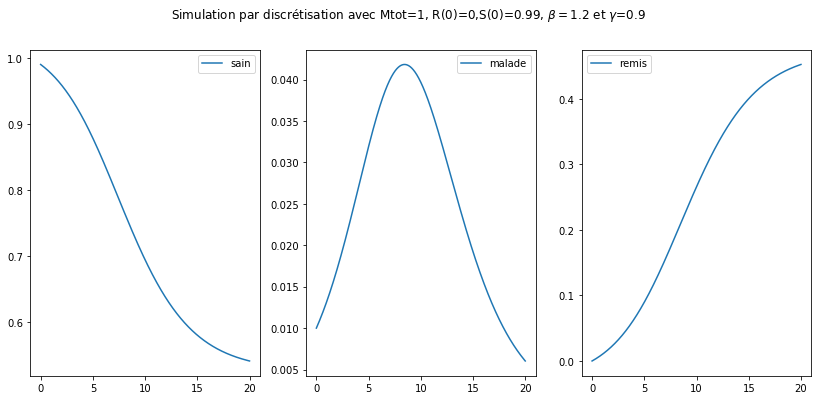

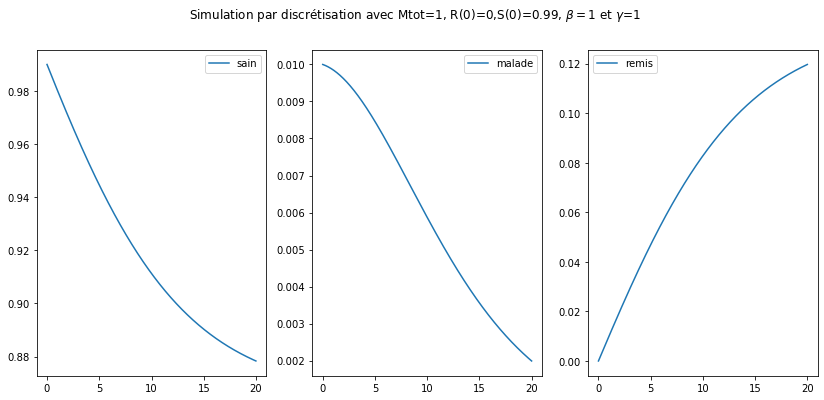

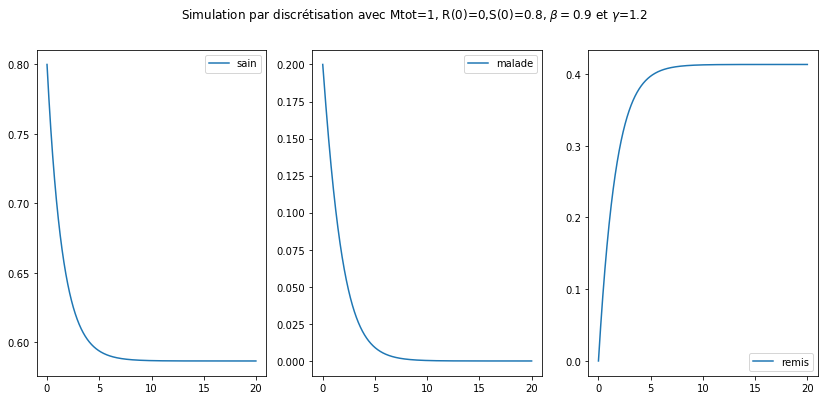

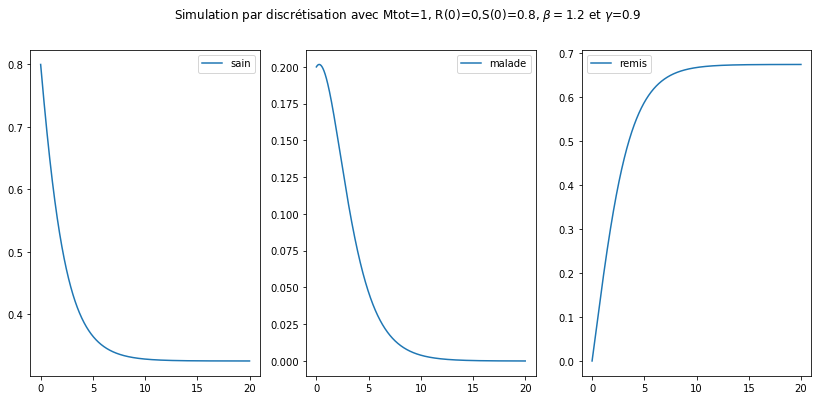

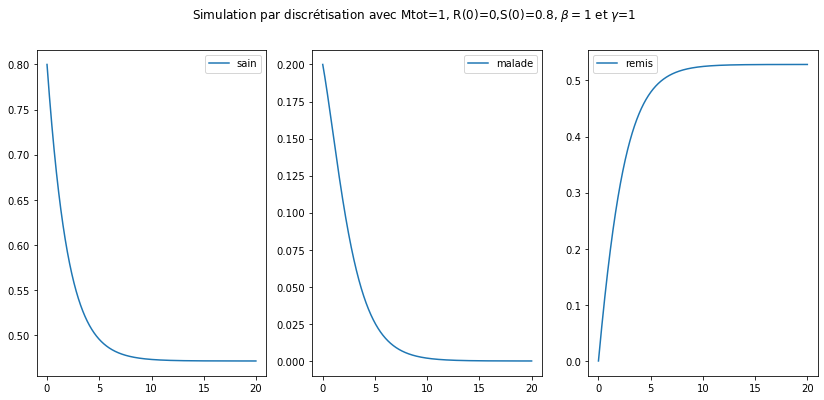

In [6]:
#S2
#Cellule qui trace l'évolution des suites en fonction des paramètres initiaux
T=[delta_t*i for i in range(0,N)]
for S0 in [0.99,0.8]:
    for [beta,gamma] in [[0.9,1.2],[1.2,0.9],[1,1]]:
        li=evolution1(N,delta_t,beta,gamma,m0,S0,0,m0-S0)
        S=li[0]
        R=li[2]
        I=li[1]
        #Nous traçons les courbes
        plt.figure(figsize = (14, 6))
        plt.suptitle(fr"Simulation par discrétisation avec Mtot=1, R(0)=0,S(0)={S0}, $\beta ={beta}$ et $\gamma$={gamma}")
        plt.subplot(1,3,1)
        plt.plot(T,S,label="sain")
        plt.legend(loc='best')
        plt.subplot(1,3,2)
        plt.plot(T,I,label="malade")
        plt.legend(loc='best')
        plt.subplot(1,3,3)
        plt.plot(T,R,label="remis")
        plt.legend(loc='best')
        

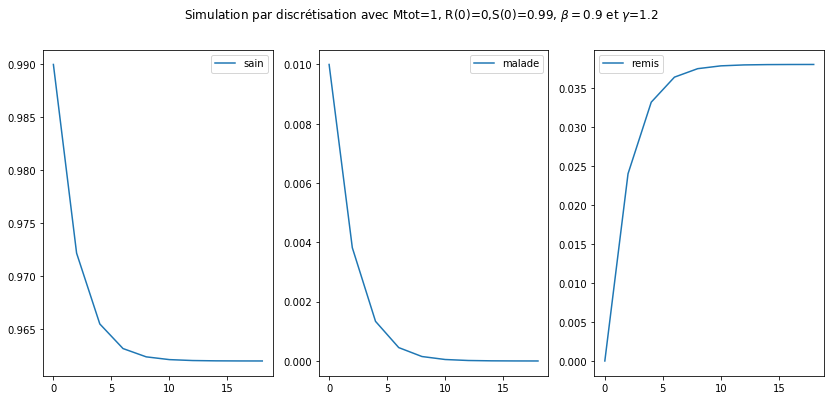

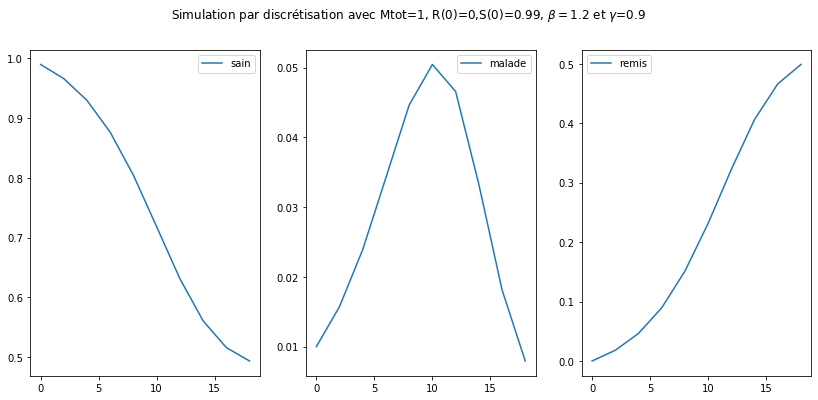

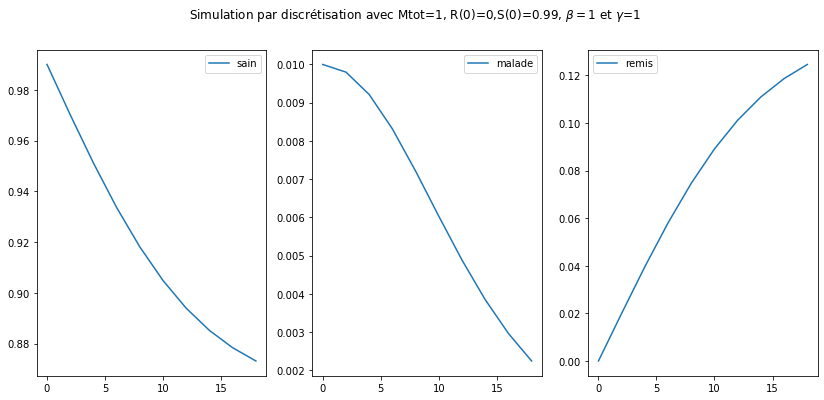

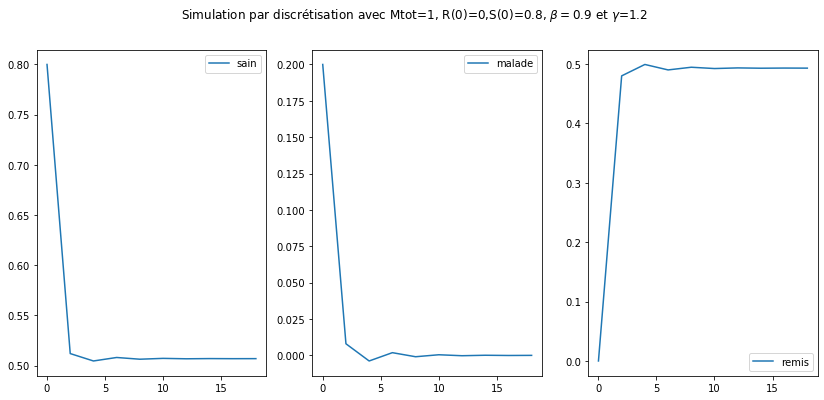

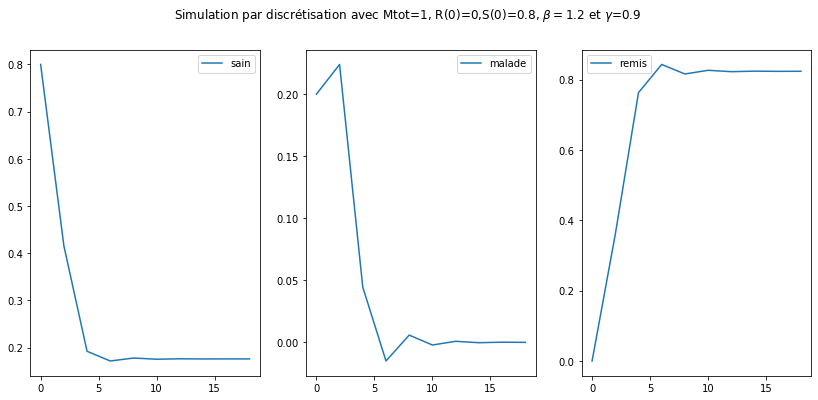

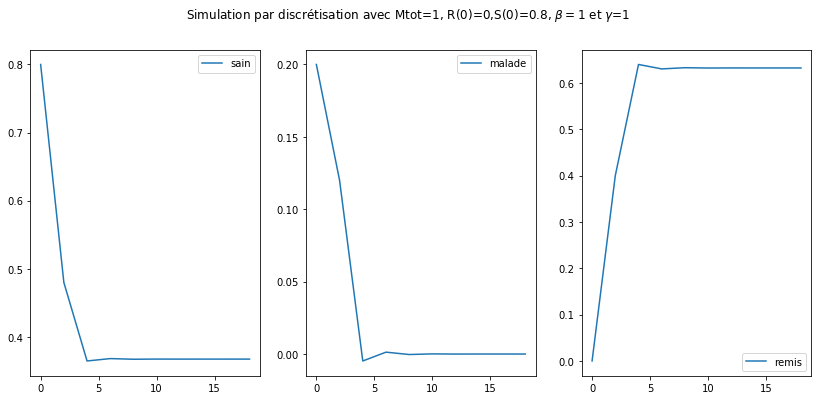

In [8]:
#S3
#test du modèle d'évolution lorsque delta_t est très grand, ici il est égal à 2, les courbes ne sont pas aussi belles que celles d'avant car le déve-
#loppement limité à l'ordre 1 est moins précis car l'intervalle de temps a augmenté
N=10
delta_t=2
T=[i*delta_t for i in range(0,N)]


for S0 in [0.99,0.8]:
    for [beta,gamma] in [[0.9,1.2],[1.2,0.9],[1,1]]:
        li=evolution1(N,delta_t,beta,gamma,m0,S0,0,m0-S0)
        S=li[0]
        R=li[2]
        I=li[1]
        #Nous traçons les courbes
        plt.figure(figsize = (14, 6))
        plt.suptitle(fr"Simulation par discrétisation avec Mtot=1, R(0)=0,S(0)={S0}, $\beta ={beta}$ et $\gamma$={gamma}")
        plt.subplot(1,3,1)
        plt.plot(T,S,label="sain")
        plt.legend(loc='best')
        plt.subplot(1,3,2)
        plt.plot(T,I,label="malade")
        plt.legend(loc='best')
        plt.subplot(1,3,3)
        plt.plot(T,R,label="remis")
        plt.legend(loc='best')

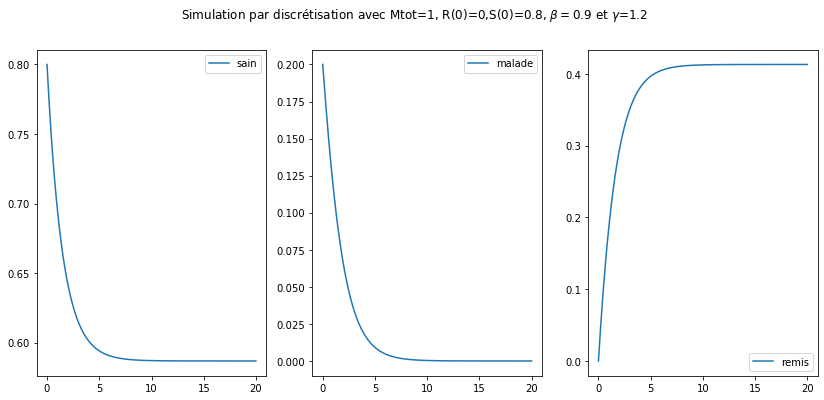

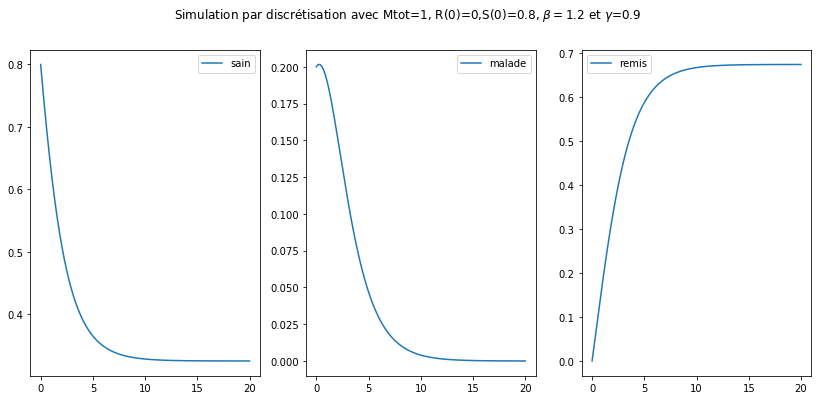

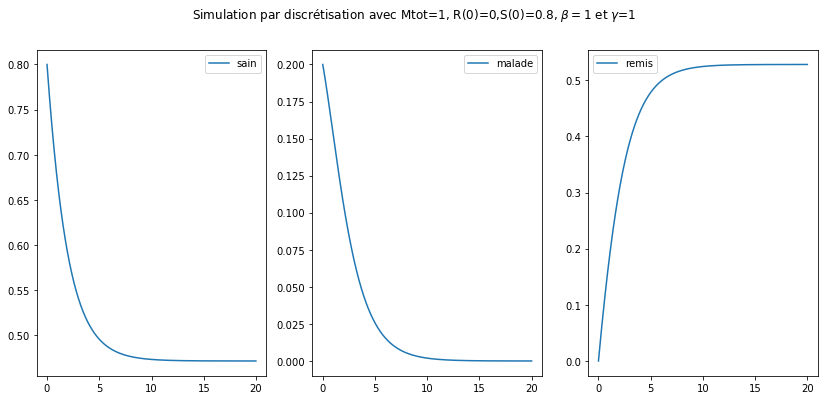

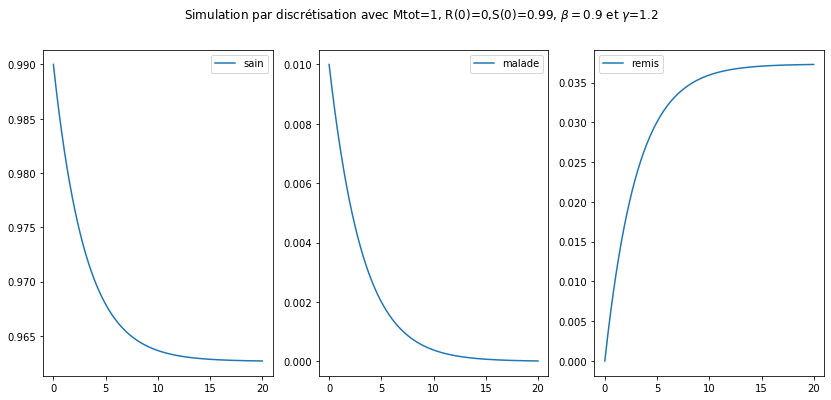

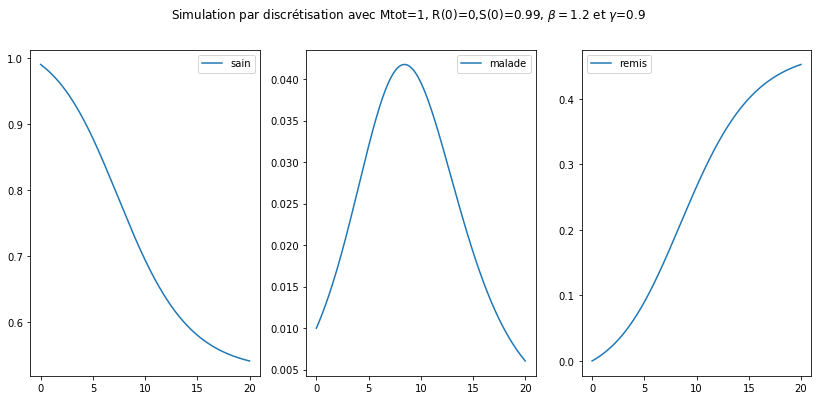

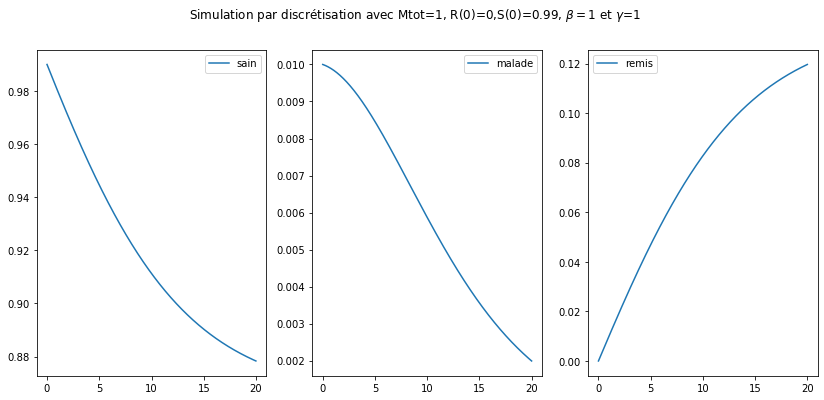

In [29]:
#S4
#Utilisation de la méthode odeing afin de résoudre le système d'équations différentielles
delta_t=0.01
def derivee(X,t):#Nous définissons la fonction qui au vecteur [S,I,R] associe sa dérivée
    return [-beta*X[0]*X[1]/m0,beta*X[0]*X[1]-gamma*X[1],gamma*X[1]]

T=[i*delta_t for i in range(0,N)]
for S0 in [0.8,0.99]:
    for [beta1,gamma1] in [[0.9,1.2],[1.2,0.9],[1,1]]:
        beta=beta1
        gamma=gamma1
        resultat=odeint(derivee,[S0,1-S0,0],T)#Nous utilisons odeint sur une fonction renvoyant le triplet [Sains,Infectés,Remis] 
        S_odeint=np.zeros(N)
        R_odeint=np.zeros(N)
        I_odeint=np.zeros(N)
        for i in range(N):
            S_odeint[i]=resultat[i][0]
            I_odeint[i]=resultat[i][1]
            R_odeint[i]=resultat[i][2]
        #Nous traçons les courbes
        plt.figure(figsize = (14, 6))
        plt.suptitle(fr"Simulation par discrétisation avec Mtot=1, R(0)=0,S(0)={S0}, $\beta ={beta}$ et $\gamma$={gamma}")
        plt.subplot(1,3,1)
        plt.plot(T,S_odeint,label="sain")
        plt.legend(loc='best')
        plt.subplot(1,3,2)
        plt.plot(T,I_odeint,label="malade")
        plt.legend(loc='best')
        plt.subplot(1,3,3)
        plt.plot(T,R_odeint,label="remis")
        plt.legend(loc='best')
        


<h1><strong>2.Un modèle stochastique</strong></h1>

<h2>Premier regard sur le modèle stochastique</h2>

<h3>T5)</h3>

* La suite d'instructions est bien définie  
* En effet, 0$\leq$$I_{t}$$leq$$M_{0}$ et tant que $I_{t}>0$,  
  on a bien $\frac{\beta I_{t}}{M_{0}}$ >0 donc on peut considérer des horloges exponentielles de paramètre $\frac{\beta I_{t}}{M_{0}}$  
  En prenant comme convention qu'aucun individu sain ne peut plus être infecté quand $I_{t}$ = 0, le modèle est bien défini
* $\gamma$>0 donc nous pouvons également définir des horloges exponentielles de paramètres $\gamma$
* La suite d'instructions ne précise pas la conduite à tenir <strong>si 2 horloges sonnent en même temps</strong>.
  Montrons qu'avec probabilité 1, cela n'arrive jamais. Soient ($X_{1}$,...,$X_{n}$) les horloges des individus sains et ($Y_{1}$,...,$Y_{n}$) les     horloges des individus infectés. Examinons la loi de min($X_{i}$), min($Y_{i}$). Soit x>0:  
  P(min($X_{i}$)$\ge$x) = P($X_{1}$$\ge$x,...,$X_{n}$$\ge$x) = $P(X_{1} \ge x)^n$ = $e^{nx\lambda}$ avec $\lambda$=$\frac{I_{t}\beta}{M_{0}}$  
  Or min($X_{i}$ ) et min($Y_{i}$ ) sont indépendantes. Donc min($X_{i}$ ) - min($Y_{i}$ ) suit une loi à densité. Ainsi:  
  P(min($X_{i}$ )- min($Y_{i}$)=0) = 0  
  Donc presque sûrement la première horloge des sains et la première des infectés ne sonnent pas en même temps.  
  De plus P($X_{i}$=$X_{j}$)=0 car $X_{i}$-$X_{i}$ est à densité.  
  De même P($Y_{i}$=$Y_{j}$)=0.  
  Donc presque sûrement l'horloge qui en sonne en premier est bien définie.  
* Montrons que la suite d'instructions se finit toujours. Dans le pire des cas, tous les individus sains sont infectés. Mais, alors ils finissent par se rétablir au bout d'un certain temps (quand l'horloge sonne  et alors la simulation s'arrête). Donc la simulation s'arrête toujours
* Il faut retirer les horloges d'infections car leur paramètre est modifié à chaque événement. En revanche, on peut au choix retirer ou conserver les   horloges de guérison restantes. Cela est dû à la <strong>propriété de perte de mémoire</strong> des horloges exponentielles.  
  Si X $\backsim$ $\epsilon$($\gamma$),
      P(X>a+t|X>a)=P(X>t)
  Prenons a = instant du dernier événement
             t = durée avant le prochain événement
  Si nous modifions l'horloge de guérison, la personne reste infectée avec une probabilité P'(X>t). Si nous conservons l'horloge de guérison, la personne reste infectée avec une probabilité P'(X>a+t|X>a). C'est donc équivalent.

<h3>T6)</h3>

* On a déjà vu que la suite d'instructions finissait presque sûrement. Donc nous avons forcèment à la fin $I_{t}$=0 car tous les individus infectés finissent par se rétablir quand leur horloge sonne. S($\infty$) est bien un entier et $I_{t}+S_{t}+R_{t}=M_{0}$ pour tout t (les individus sont soit infectés, soit sains, soit rétablis).  
  Donc S($\infty$)+0+R($\infty$) = $M_{0}$. Ainsi, presque sûrement l'état final est: (S$\infty ),0,M_{0}-S(\infty$))

<h2>Simplification du modèle</h2>

<h3>T7)</h3>

* Soit X = min($X_{1},...,X_{n}$), nous avons pour x$\ge$0 et par indépendance des ($X_{i}$):  
  P(X$\ge$x)= P($X_{1}\ge x,...,X_{n}\ge x$)=P($X_{1}\ge x$)*...*P($X_{n}\ge x$)=$e^{-(\lambda_{1}+...+\lambda_{n})x}$  
  et P(X$\ge$x)=1 si x<0
* Nous posons $F_{X}(x)$=1-$e^{-(\lambda_{1}+...+\lambda_{n})x}$  si x$\ge$0   
                        0 sinon  
  Donc X $\backsim$ $\epsilon$($\lambda_{1}$+...+$\lambda_{n}$)  
* A=P(X$\leq$y,$X_{1}$=min($X_{1},...,X_{n}$)=P($X_{1}\leq y,X_{1}\leq X_{2},...,X_{1}\leq$ $ X_{n}$)  
  A=P(($X_{1},...,X_{n})\in A$) où A est un bon ensemble  
  A= $\idotsint_{R_{n}} 1_{A}(x) f_{(X_{1},...,X_{n})}(x) dx$  
  A= $\idotsint_{R_{n}} 1_{A}(x) f_{X_{1}}(x_{1})*...*f_{X_{n}}(x_{n})dx_1...dx_n$  
  A= $\displaystyle \int_{x_{1}=0}^{y}$$\displaystyle \int_{x_{2}=x_{2}}^{\infty}$...$\displaystyle \int_{x_{n}=x_{1}}^{\infty} \lambda_1*e^{-x_{1}\lambda_1}*...*\lambda_n*e^{-x_{n}\lambda_n}dx_1...dx_n$  
  A=$\displaystyle \int_{x_{1}=0}^{y} \lambda_1*e^{-x_{1}\lambda_1}*e^{-x_{1}\lambda_2}*...*e^{-x_{1}\lambda_n}$dx1  
  A=$\frac{\lambda_1}{\lambda_1+...+\lambda_n}$$\displaystyle \int_{x_{1}=0}^{y} (\lambda_1+...+\lambda_n)e^{-(\lambda_1+...+\lambda_n)x_1}dx_1$  
  A=$\frac{\lambda_1}{\lambda_1+...+\lambda_n}$P(X$\leq$y)  
  Or $P(X_1=min(X_1,...,X_n))=P(X_1\leq X_2,...,X_1\leq X_n)$  
  $P(X_1=min(X_1,...,X_n))$=$\displaystyle \int_{x_{1}=0}^{y}$$\displaystyle \int_{x_{2}=x_{2}}^{\infty}$...$\displaystyle \int_{x_{n}=x_{1}}^{\infty} \lambda_1*e^{-x_{1}\lambda_1}*...*\lambda_n*e^{-x_{n}\lambda_n}dx_1...dx_n$  
  $P(X_1=min(X_1,...,X_n))$=$\frac{\lambda_1}{\lambda_1+...+\lambda_n}$(même calcul qu'avant pour y=$\infty$)  
  Donc P(X$\leq$y, $X_1$=min($X_1,...,X_n$))=P(X$\leq$y)* P($X_1$=min($X_1,...,X_n)$)  
  Donc <strong>X et {$X_1$=min($X_1,...,X_n$)} sont indépendants</strong>. Les $X_1$ sont donc interchangeables donc c'est encore vrai pour $X_i$ où 1$\leq i \leq n$
  

<h3>T8)</h3>

* La probabilité quand nous sommes dans l'état ($S'_t,I'_t,R'_t$) de passer dans l'état ($S'_t,I'_t -1,R'_t +1$) (guérison) est: P(X'$\leq$Y'), où X'$\backsim \epsilon(\gamma I'_t$) et Y'$\backsim \epsilon(\frac{\beta I'_t S'_t}{M_0})$ avec X' et Y' indépendantes  
* La probabilité quand nous sommes dans l'état ($S_t,I_t,R_t$) de passer dans l'état ($S_t,I_t -1,R_t +1$) est P(X$\leq$Y), où X=min($X_1,...,X_{I_t}$)avec les $X_i$ indépendantes identiquement distribuées, $X_1 \backsim \epsilon(\gamma)$, et Y=min($Y_1,...,Y_{S_t}$) avec les $Y_i$ indépendantes identiquement distribuées, $Y_1 \backsim \epsilon(\frac{\beta I_t}{M_0})$  
  Supposons que l'on parte du même état ($S'_t,I'_t,R'_t$) = ($S_t,I_t,R_t$). Nous avons vu à la question T7) que X=$\backsim \epsilon(\gamma I'_t$), donc X $\backsim$X'. Et Y $\backsim \epsilon(\frac{\beta I_t S_t}{M_0})$, donc Y$\backsim$Y'.  
  De plus, X' et Y' sont indépendantes, et X et Y sont indépendantes. Donc X'-Y'$\backsim$X-Y. Donc P(X'$\geq$Y')=P(X$\geq$Y).  
  Donc dans les deux cas, nous avons la même probabilité pour une guérison ou pour une infection. Donc l'évolution de ($S'_t,I'_t,R'_t$) et de ($S_t,I_t,R_t$) est la même. Donc <strong> ($S'_t,I'_t,R'_t$) et ($S_t,I_t,R_t$) ont la même loi</strong>.
  

In [37]:
#S5
#Cette fonction permet de passer de la configuration à l'instant t à celle  suivante (lorsqu'une horloge a sonné), cette fonction renvoie aussi le temps
#qu'il s'est écoulé pendant cette période
def periode(I,S,R,gamma,beta,m0):
                                    
    rvi=expon(gamma)
    horloge_i=[rvi.rvs() for i in range(I)]  #Nous créons une liste d'horloge exponentielle pour les personnes infectées
    min_i=np.min(horloge_i)
    if S!=0:                                 #Nous créons une liste d'horloge exponentielle pour les personnes saines
        rvs=expon(beta*I/m0)
        horloge_s=[rvs.rvs() for s in range(S)]
    if ((S!=0) and (I!=0)):                  #Si ils y a des personnes saines et des personnes infectées nous prenons l'horloge qui a sonné en premier
        min_i=np.min(horloge_i)              #Puis suivant le cas nous renvoyons le bon triplet
        min_s=np.min(horloge_s)
        if min_i<min_s:
            return [I-1,S,R+1,min_i]
        else:
            return [I+1,S-1,R,min_s]
    if S==0:                                  #S'il n'y a plus de personnes saines alors forcément le nombre d'infectés va diminué
        return [I-1,S,R+1,min_i]

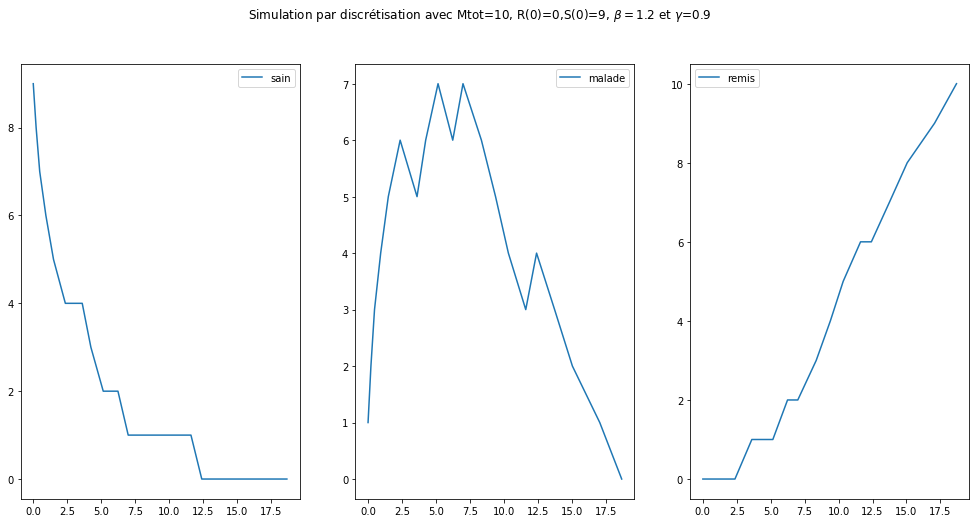

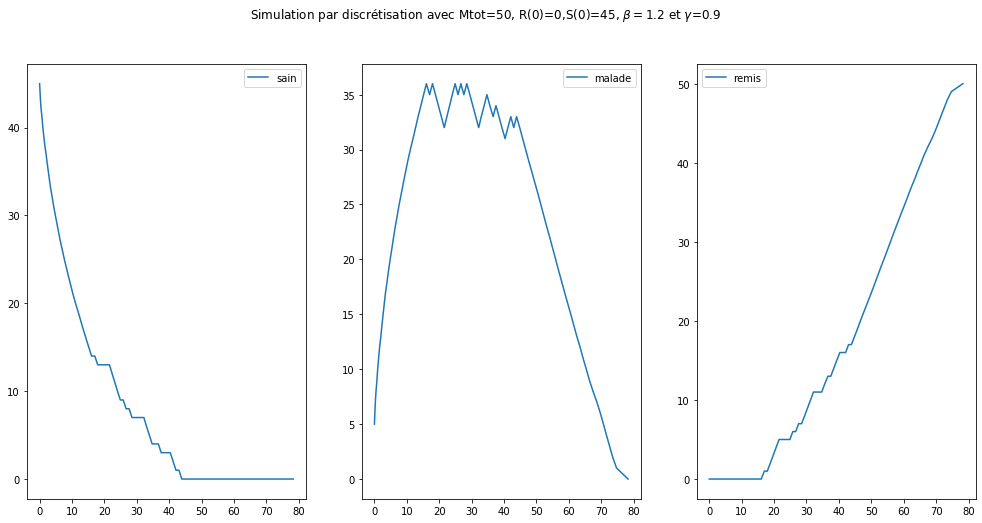

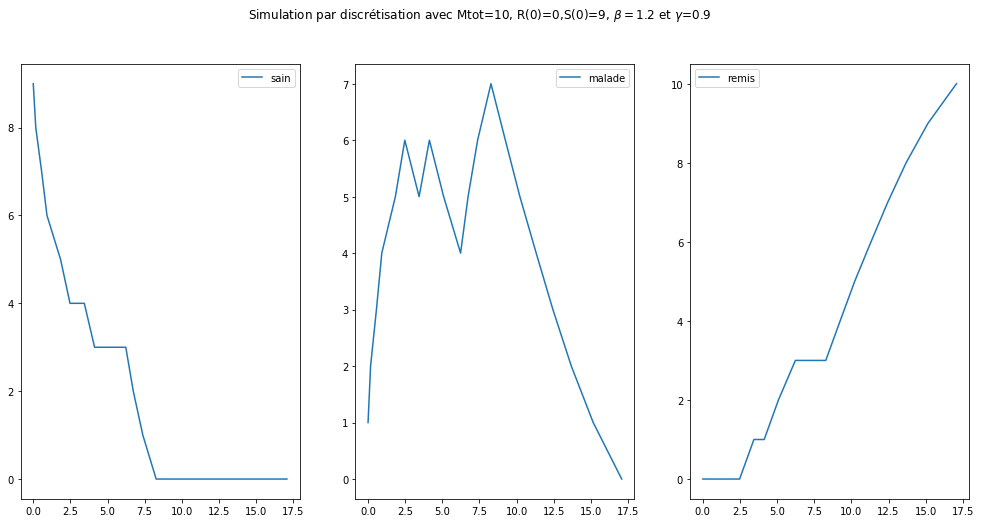

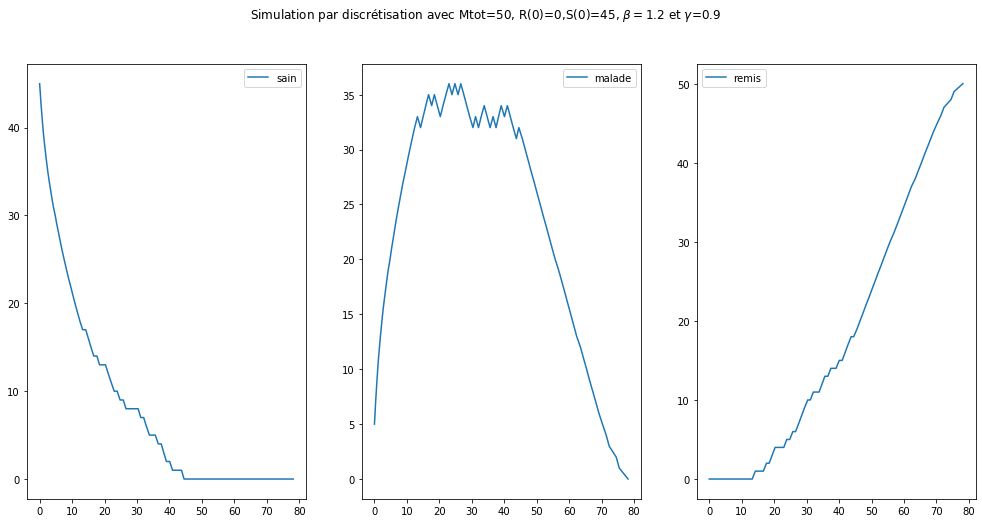

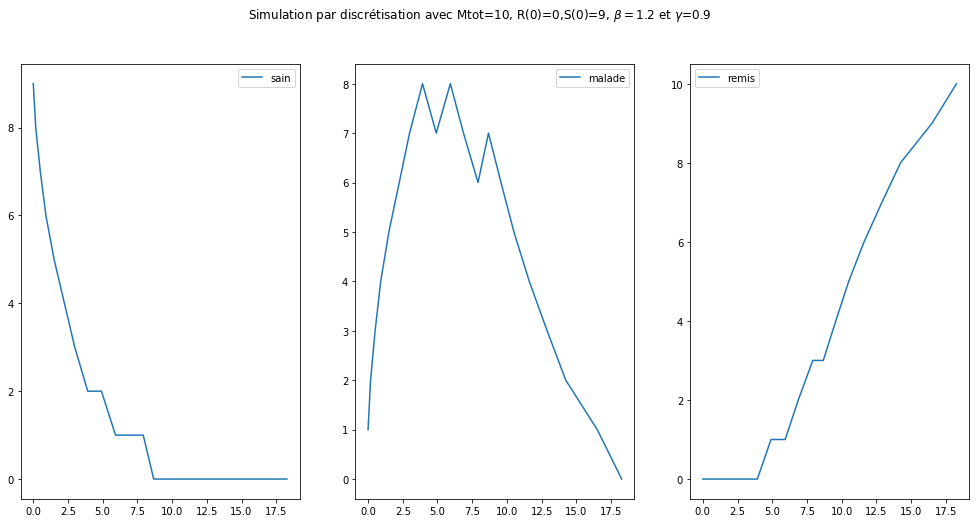

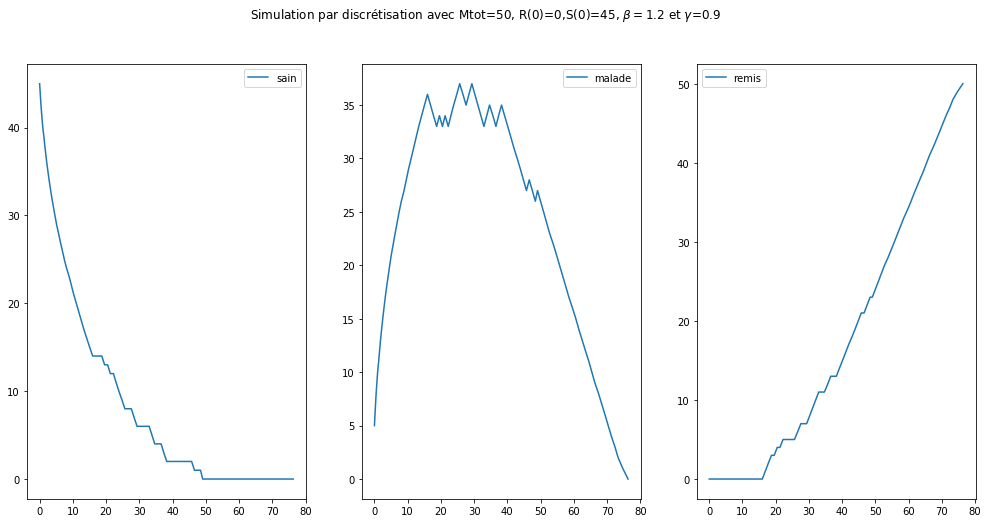

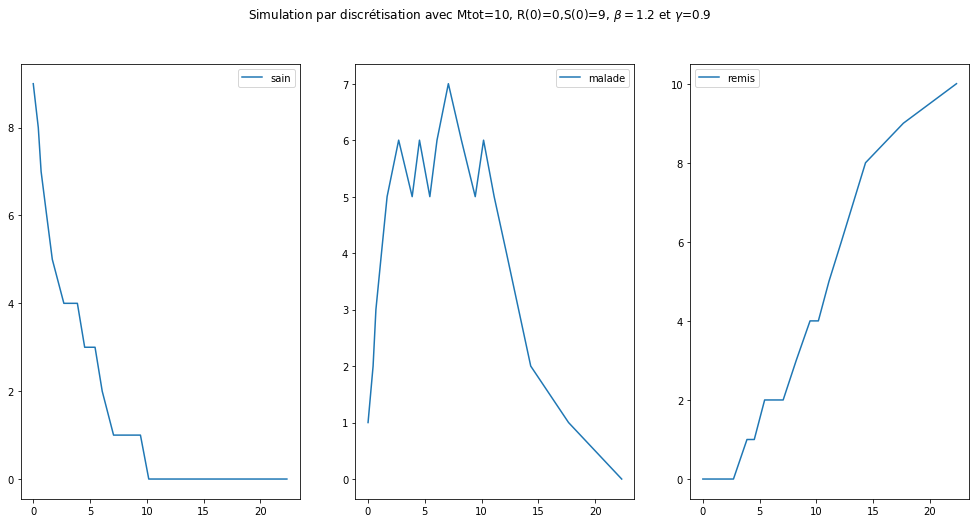

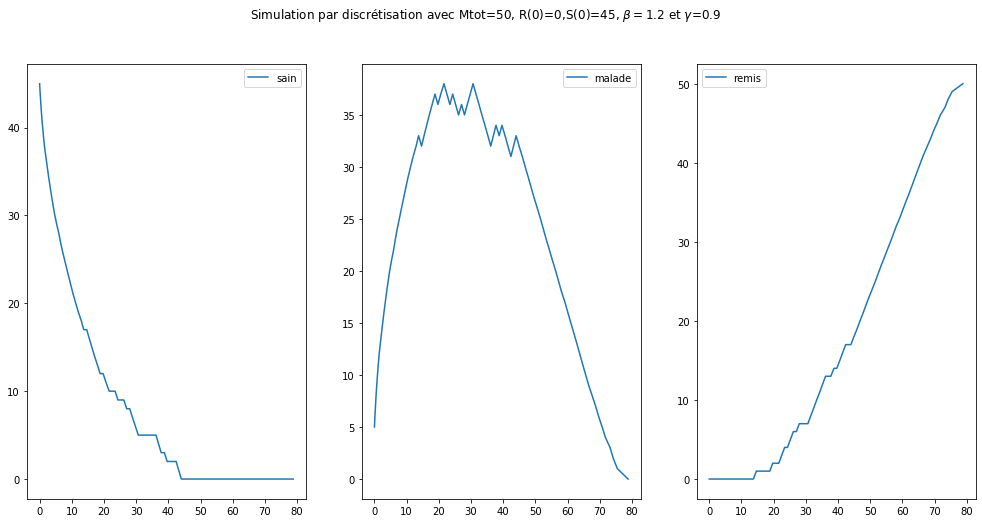

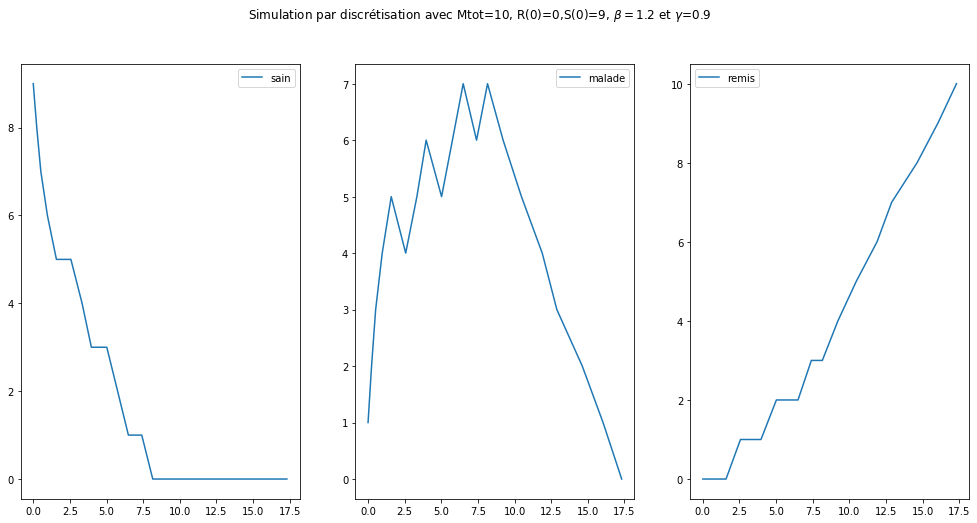

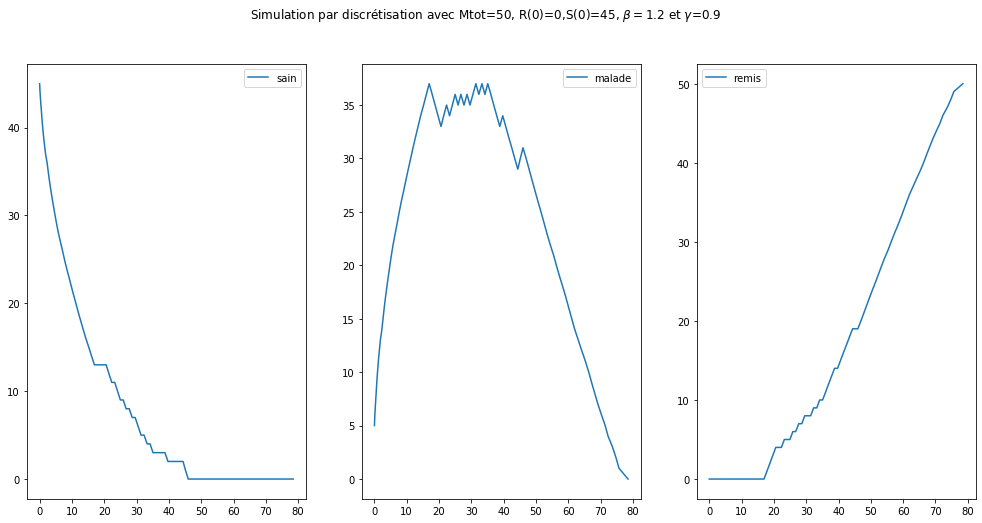

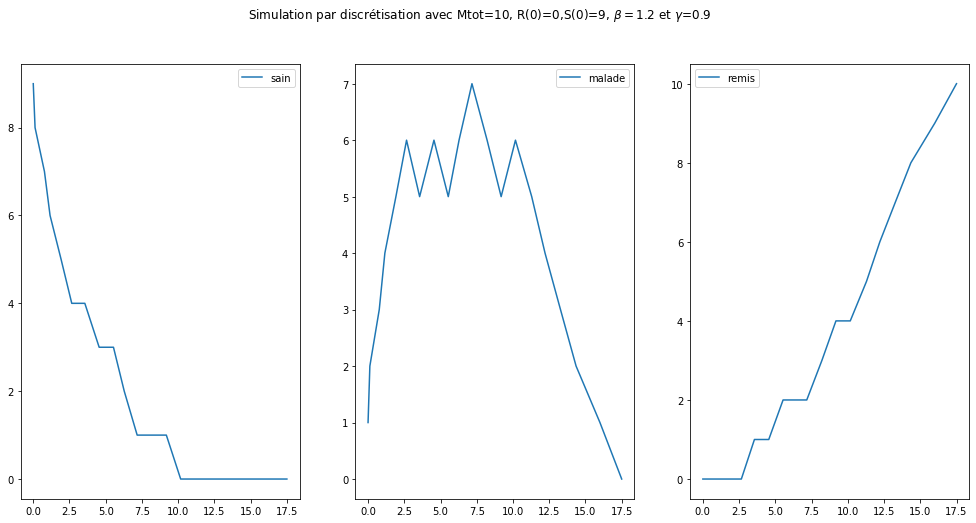

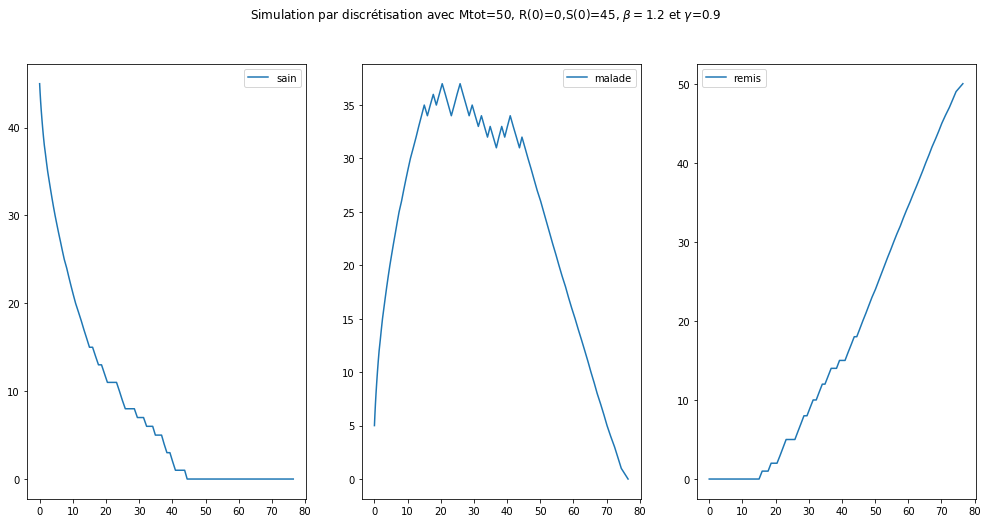

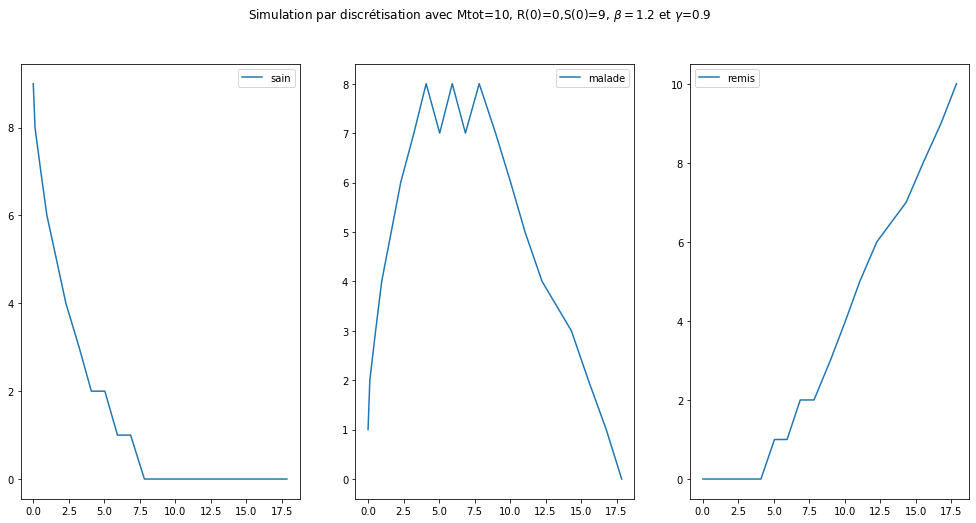

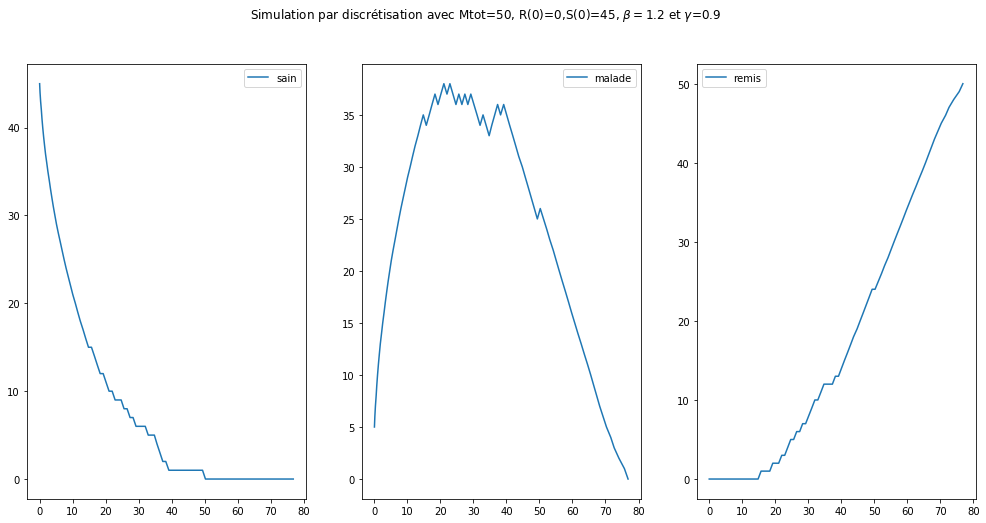

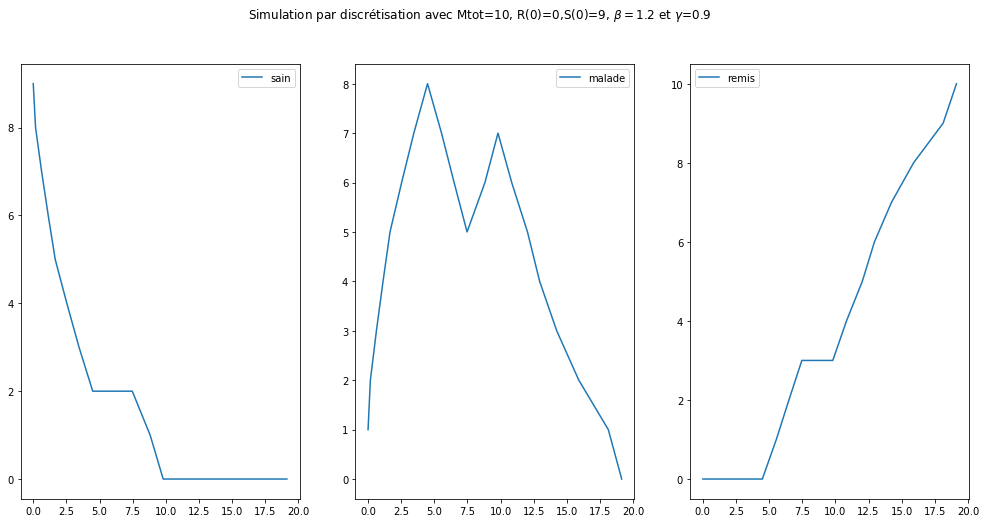

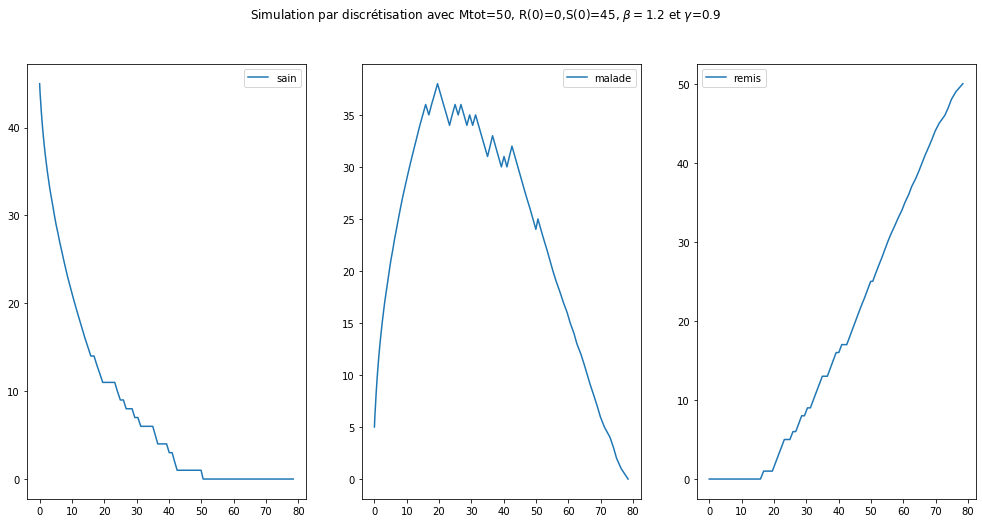

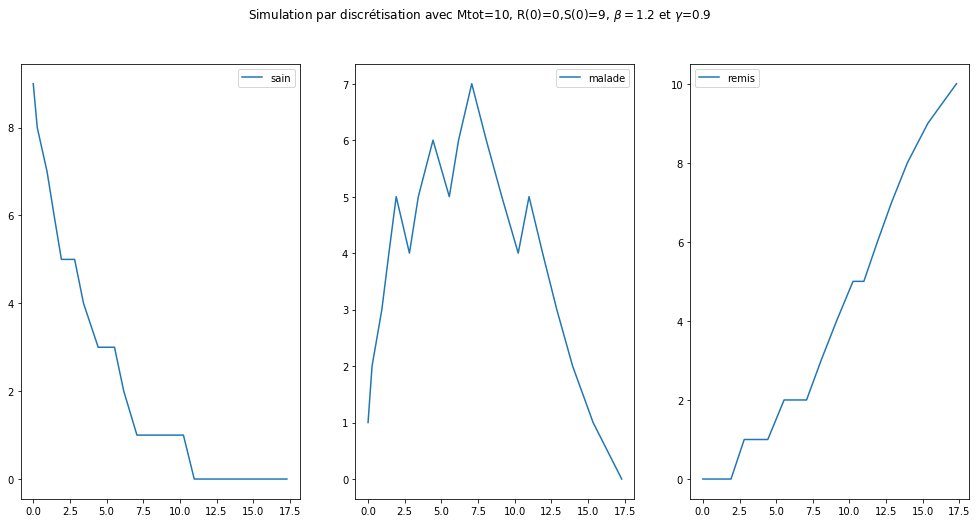

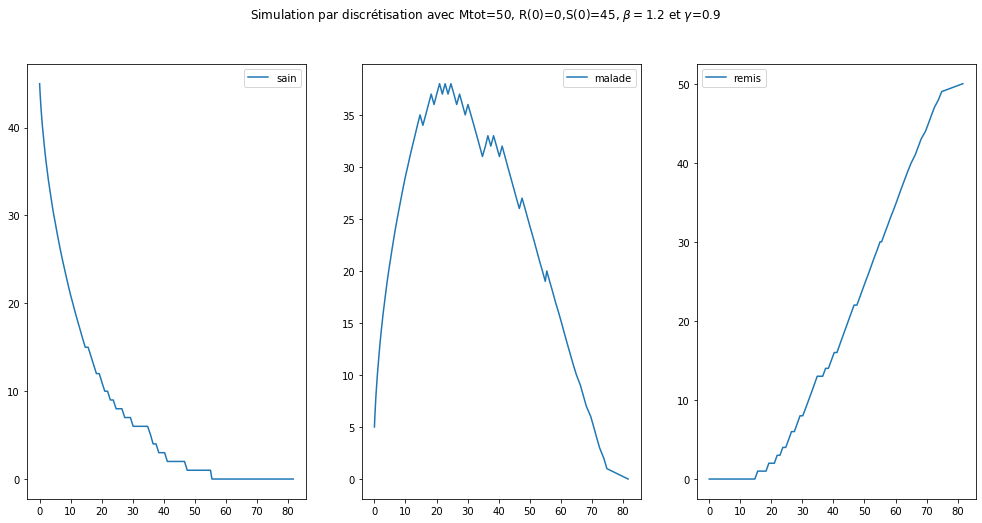

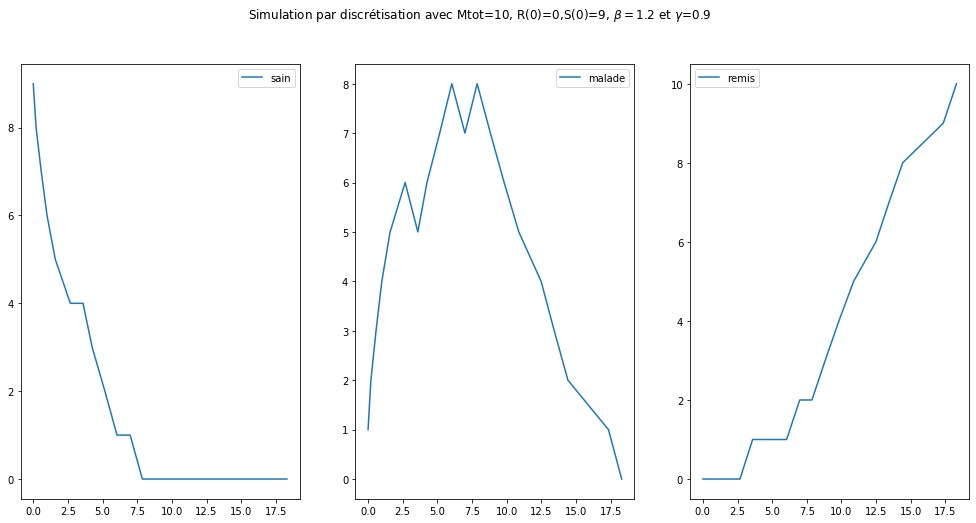

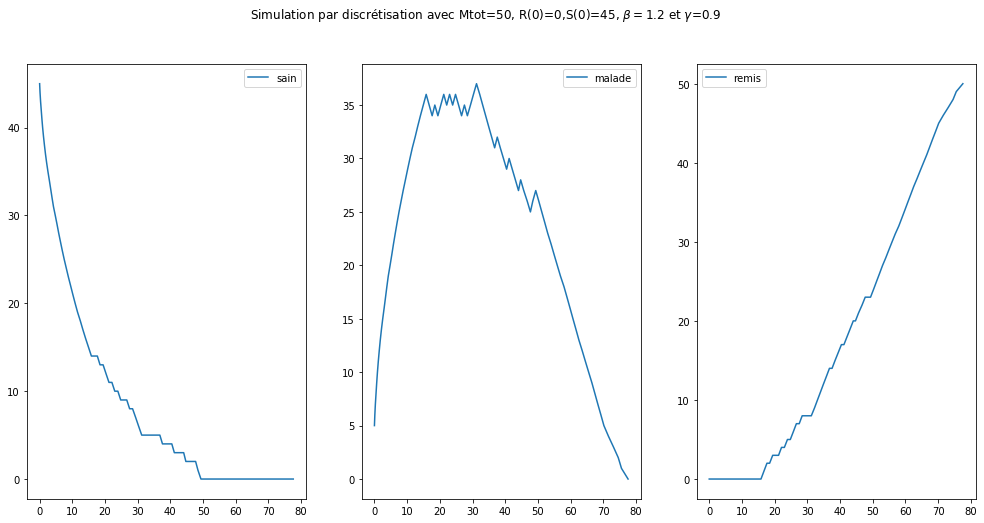

In [24]:
#S6
for i in range(10):
    for m0 in [10,50]:
        #Déclaration des paramètres initiaux
            S_sto=[0]
            I_sto=[0]
            R_sto=[0]
            beta=1.2
            gamma=0.9
            I_sto[0]=int(0.1*m0)
            S_sto[0]=int(0.9*m0)
            X=[0]#Axe des abscisse
            while (R_sto[-1]!=(m0-S_sto[-1])):  #Tant que nous ne sommes pas arrivés à la condition pour un temps infini nous continuons
                trio=periode(I_sto[-1],S_sto[-1],R_sto[-1],gamma,beta,m0)
                I_sto.append(trio[0])
                S_sto.append(trio[1])
                R_sto.append(trio[2])
                X.append(X[-1]+trio[3])
            #Nous traçons les courbes
            plt.figure(figsize = (17, 8))
            plt.suptitle(fr"Simulation par discrétisation avec Mtot={m0}, R(0)=0,S(0)={S_sto[0]}, $\beta ={beta}$ et $\gamma$={gamma}")
            plt.subplot(1,3,1)
            plt.plot(X,S_sto,label="sain")
            plt.legend(loc='best')
            plt.subplot(1,3,2)
            plt.plot(X,I_sto,label="malade")
            plt.legend(loc='best')
            plt.subplot(1,3,3)
            plt.plot(X,R_sto,label="remis")
            plt.legend(loc='best')
            plt.show()


In [ ]:
m=75
S_sto=[0]
I_sto=[0]
R_sto=[0]
beta=1.2
gamma=0.9
I_sto[0]=int(0.1*m)
S_sto[0]=int(0.9*m)


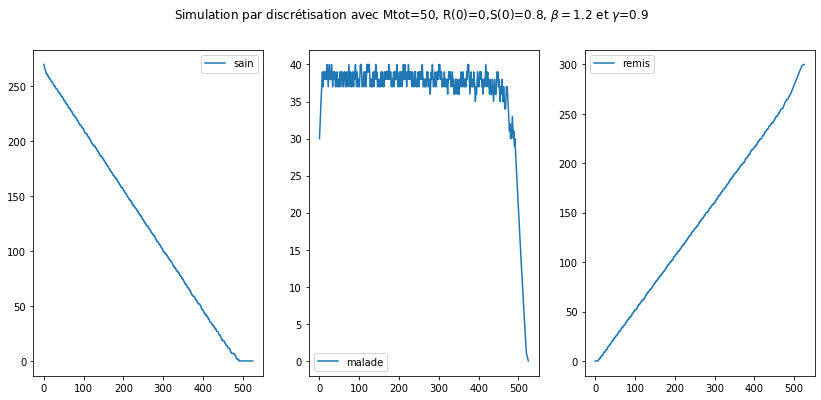

In [32]:
#m0 très grand
#Déclaration des paramètres initiaux
m=300
S_sto=[0]
I_sto=[0]
R_sto=[0]
beta=1.2
gamma=0.9
I_sto[0]=int(0.1*m)
S_sto[0]=int(0.9*m)
X=[0]
while R_sto[-1]!=(m-S_sto[-1]):                         #Tant que nous ne sommes pas arrivés à la condition pour un temps infini nous continuons
    trio=periode(I_sto[-1],S_sto[-1],R_sto[-1],gamma,beta,m0)
    I_sto.append(trio[0])
    S_sto.append(trio[1])
    R_sto.append(trio[2])
    X.append(X[-1]+trio[3])
#Nous traçons les courbes
plt.figure(figsize = (14, 6))
plt.suptitle(fr"Simulation par discrétisation avec Mtot={m0}, R(0)=0,S(0)={S0}, $\beta ={beta}$ et $\gamma$={gamma}")
plt.subplot(1,3,1)
plt.plot(X,S_sto,label="sain")
plt.legend(loc='best')
plt.subplot(1,3,2)
plt.plot(X,I_sto,label="malade")
plt.legend(loc='best')
plt.subplot(1,3,3)
plt.plot(X,R_sto,label="remis")
plt.legend(loc='best')
plt.show()

In [38]:
#S7
#Nous définissons une nouvelle fonction qui permet de passer de la configuration à l'instant t 
def periode_7(I,S,R,gamma,beta,m0):
    if I!=0:                                     #Nous créons une horloge de guérison si elle a du sens, donc si le nombre d'infecté est différent de 0
        rvi=expon(gamma*I)
        horloge_guerison=rvi.rvs() 
    if S!=0:                                     #Nous créons une horloge d'infection si elle a du sens, donc si le nombre de personnes saines est différent de 0
        rvs=expon(beta*I*S/m0)
        horloge_infection=rvs.rvs() 
    if ((S!=0) and (I!=0)):                      #Si les deux horloges existent, nous prenons celle qui sonne en premier
        if horloge_guerison<horloge_infection:
            return [I-1,S,R+1,horloge_guerison]
        else:
            return [I+1,S-1,R,horloge_infection]
                                                 #Sinon nous traitons les deux cas pathologiques
    if S==0 and I!=0:
        return [I-1,S,R+1,horloge_guerison]
    if (I==0) and (S!=0):
        return [I,S,R,horloge_infection]

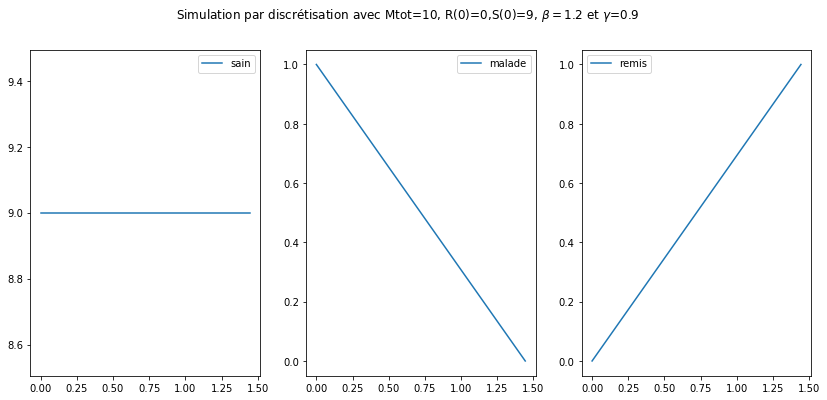

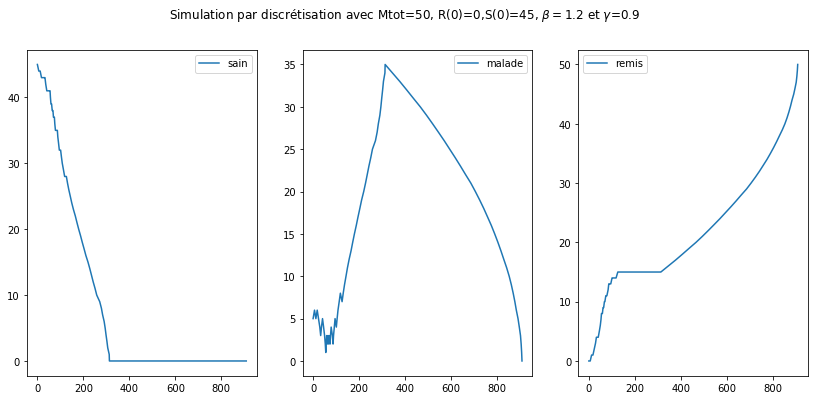

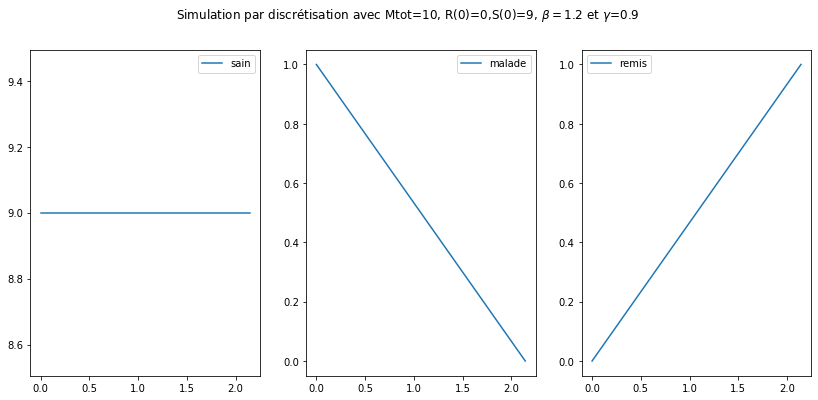

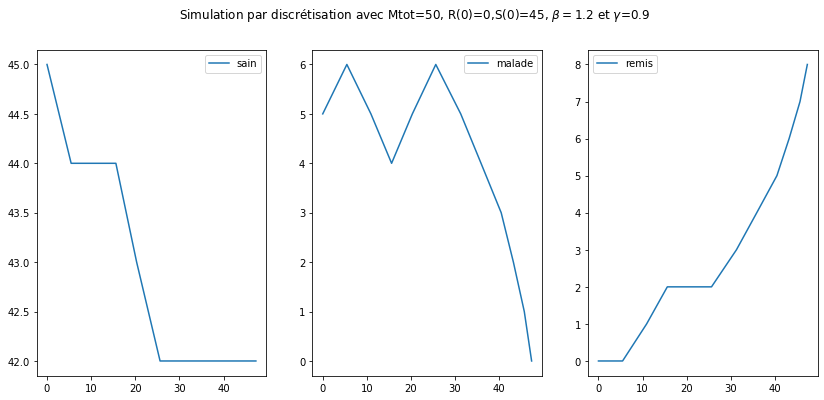

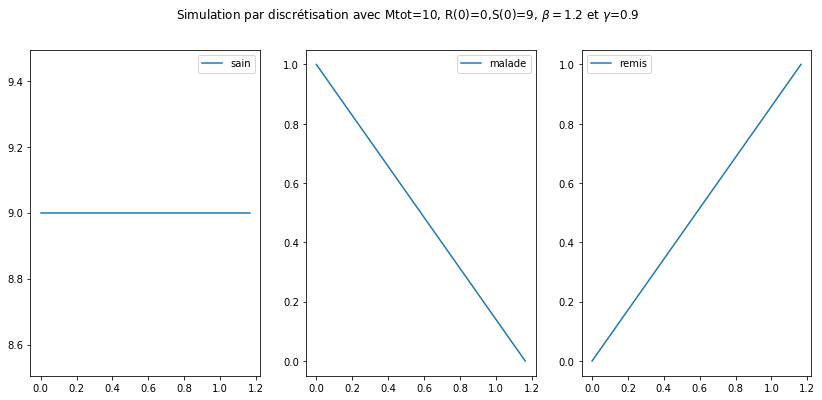

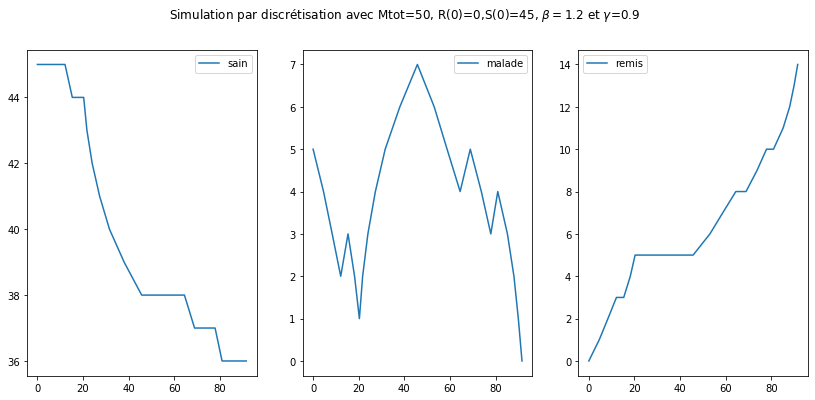

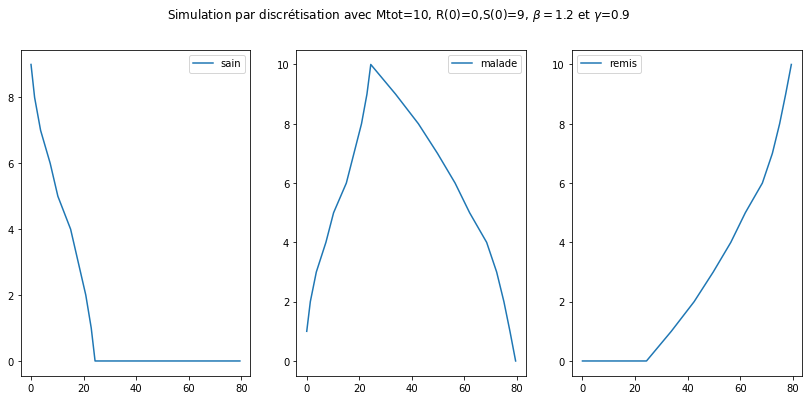

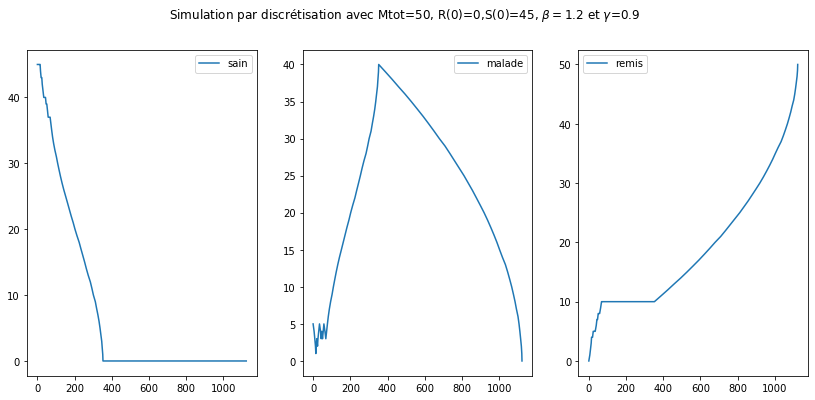

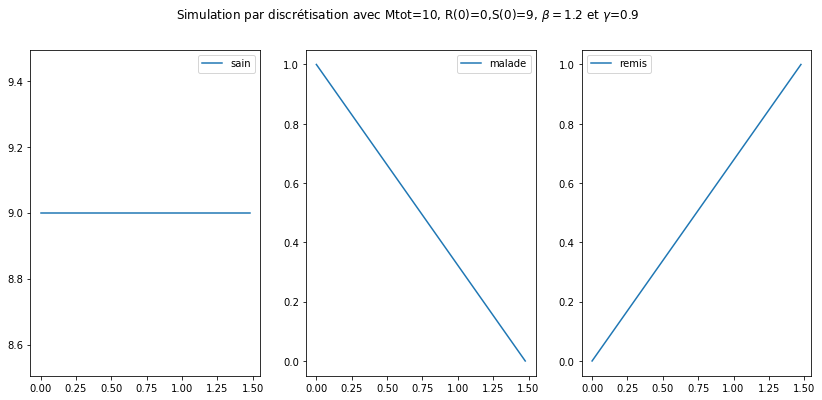

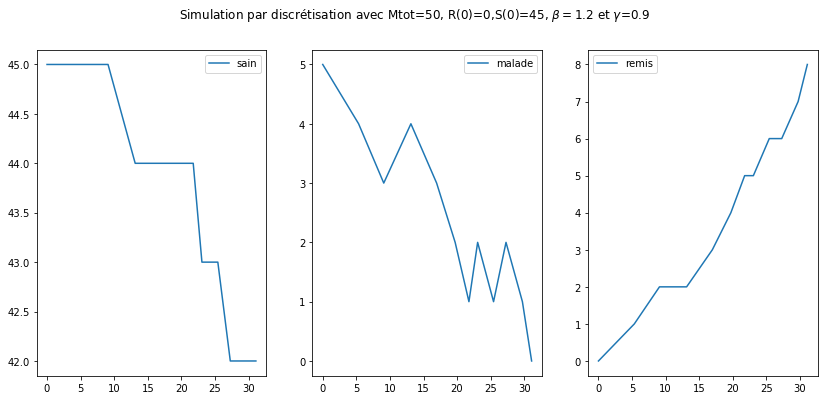

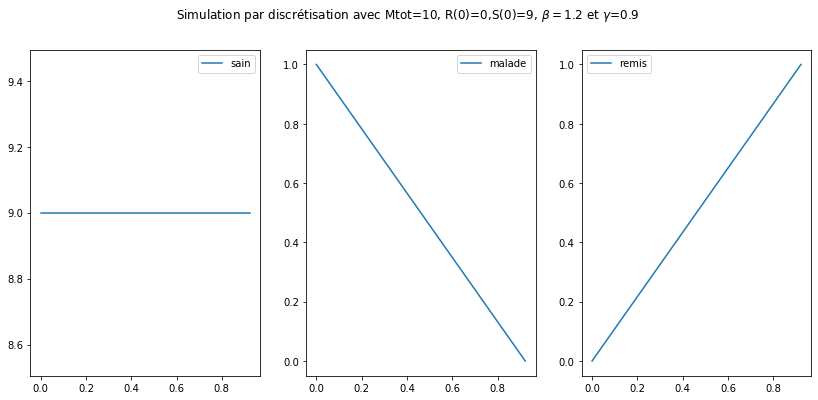

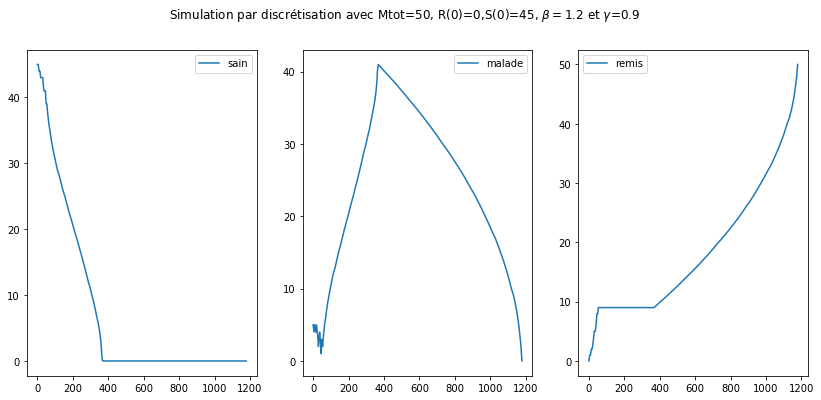

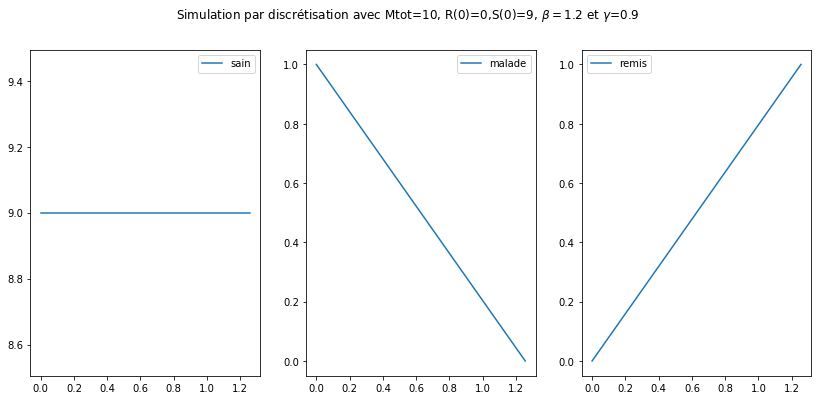

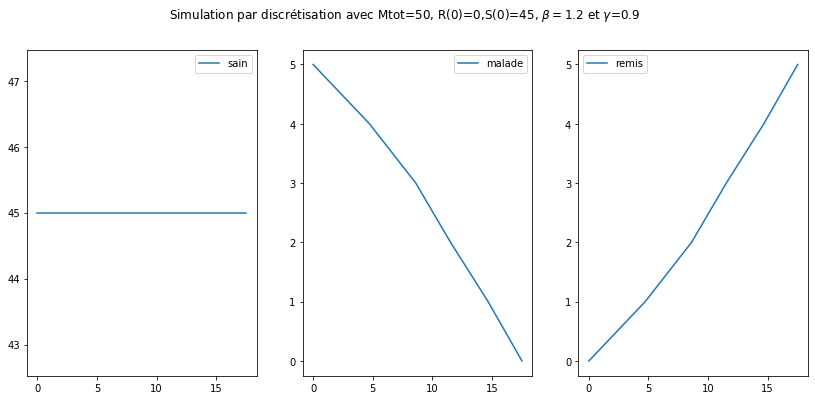

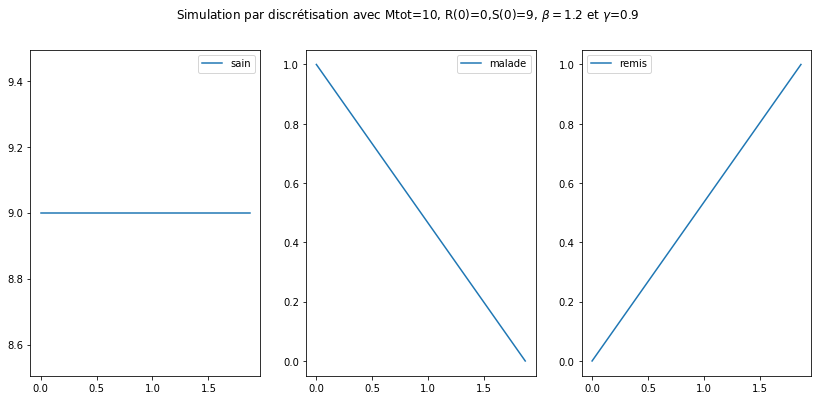

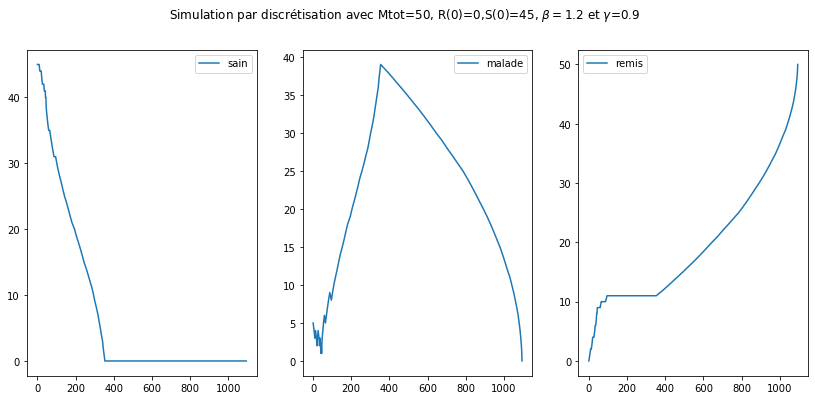

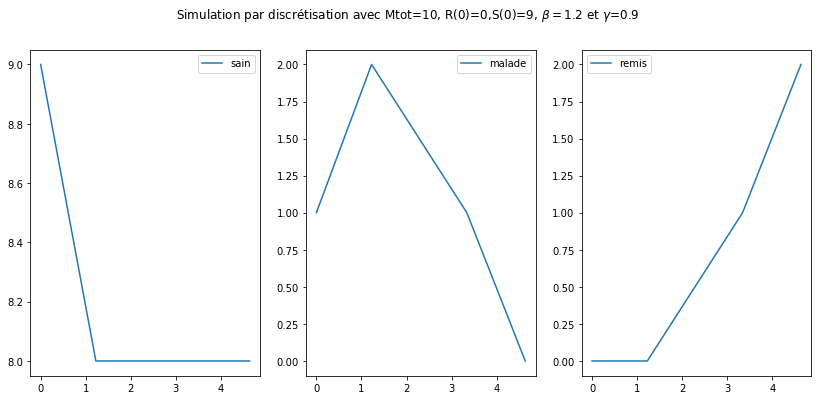

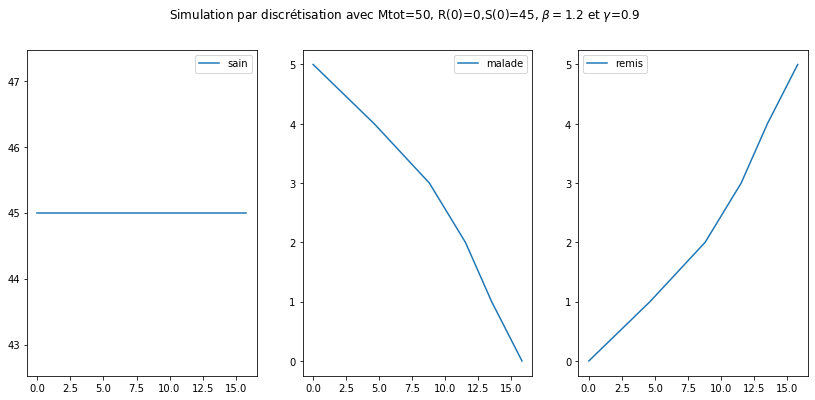

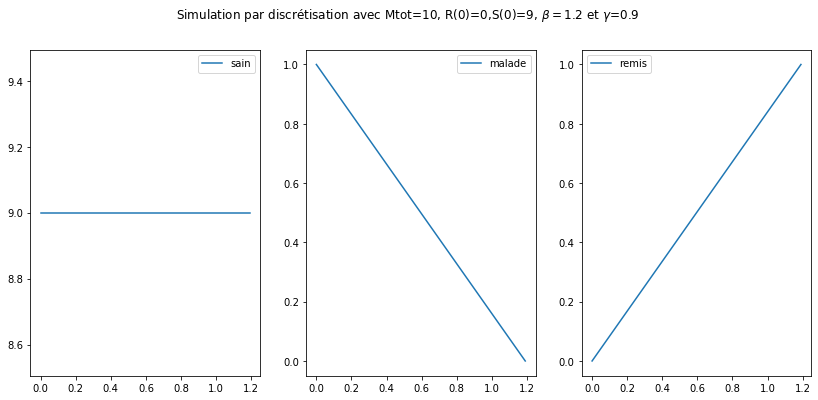

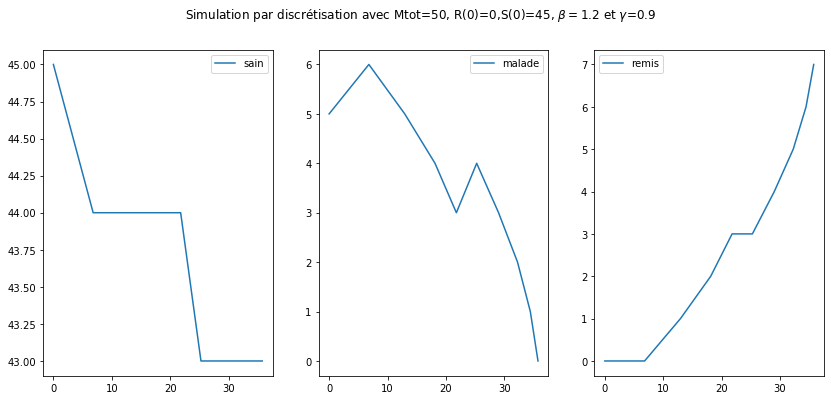

In [36]:
#S7
for i in range(10):
    for m0 in [10,50]:
        #Déclaration des paramètres initiaux
            S_sto=[0]
            I_sto=[0]
            R_sto=[0]
            beta=1.2
            gamma=0.9
            I_sto[0]=int(0.1*m0)
            S_sto[0]=int(0.9*m0)
            X=[0]
            while R_sto[-1]!=(m0-S_sto[-1]):                               #Tant que la condition à l'infini n'est pas vérifiée nous continuons d'itérer
                trio=periode_7(I_sto[-1],S_sto[-1],R_sto[-1],gamma,beta,m0)
                I_sto.append(trio[0])
                S_sto.append(trio[1])
                R_sto.append(trio[2])
                X.append(X[-1]+trio[3])
            #Nous traçons les courbes
            plt.figure(figsize = (14, 6))
            plt.suptitle(fr"Simulation par discrétisation avec Mtot={m0}, R(0)=0,S(0)={S_sto[0]}, $\beta ={beta}$ et $\gamma$={gamma}")
            plt.subplot(1,3,1)
            plt.plot(X,S_sto,label="sain")
            plt.legend(loc='best')
            plt.subplot(1,3,2)
            plt.plot(X,I_sto,label="malade")
            plt.legend(loc='best')
            plt.subplot(1,3,3)
            plt.plot(X,R_sto,label="remis")
            plt.legend(loc='best')
            plt.show()

<h3>T9)</h3>

* Nous partons de l'état (0,N,0) donc la seule transition possible est la transition guérison. Le nombre de personnes infectées à l'instant t est donc le nombre de personnes dont l'horloge deguérison n'a pas encore sonné. Nous avons donc:  
  <center>$I_{N,t} = \sum_{k=0}^N 1_{X_k\geq t}$ avec les $X_k$ indépendantes identiquement distribuées suivant la loi $\epsilon (\gamma$)</center>  
* Donc $\frac{I_{N,t}}{N} = \frac{\sum_{k=0}^N 1_{X_k\geq t}}{N} \xrightarrow[\text{N $\rightarrow$ + $\infty$}]{\text{}} E(1_{X_1\geq t})$ d'après la loi forte des grands nombres.  
  Or $E(1_{X_1\geq t}) = P(X_1\geq t) = e^{-\gamma t}$
* Ainsi  $\frac{I_{N,t}}{N} \xrightarrow[\text{N $\rightarrow$ + $\infty$}]{\text{}} e^{-\gamma t}$

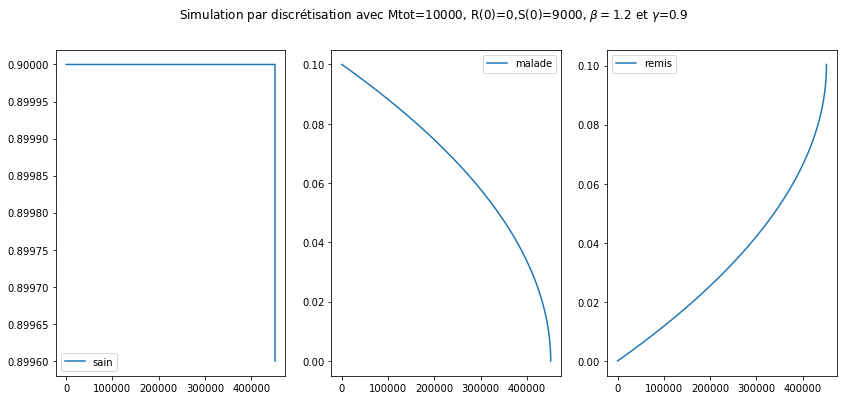

In [42]:
#S8
#Nous prenons m0 grand et nous étudions [S,I,R]/m0
m0=10000
S_sto=[0]
I_sto=[0]
R_sto=[0]
beta=1.2
gamma=0.9
I_sto[0]=int(0.1*m0)
S_sto[0]=int(0.9*m0)
count=0
X=[0]
while R_sto[-1]!=(m0-S_sto[-1]):
    trio=periode_7(I_sto[-1],S_sto[-1],R_sto[-1],gamma,beta,m0)
    I_sto.append(trio[0])
    S_sto.append(trio[1])
    R_sto.append(trio[2])
    X.append(X[-1]+trio[3])
plt.figure(figsize = (14, 6))
plt.suptitle(fr"Simulation par discrétisation avec Mtot={m0}, R(0)=0,S(0)={S_sto[0]}, $\beta ={beta}$ et $\gamma$={gamma}")
plt.subplot(1,3,1)
plt.plot(X,[S_sto[i]/m0 for i in range(len(S_sto))],label="sain")
plt.legend(loc='best')
plt.subplot(1,3,2)
plt.plot(X,[I_sto[i]/m0 for i in range(len(I_sto))],label="malade")
plt.legend(loc='best')
plt.subplot(1,3,3)
plt.plot(X,[R_sto[i]/m0 for i in range(len(R_sto))],label="remis")
plt.legend(loc='best')
plt.show()